In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl

In [3]:
data = pd.read_csv("data/train.csv")

In [4]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

             Age
VIP             
False  28.639611
True   37.449495
                  Age
HomePlanet           
Earth       26.068232
Europa      34.419664
Mars        29.297203
         Spa      Age
Spa  1.00000  0.12397
Age  0.12397  1.00000


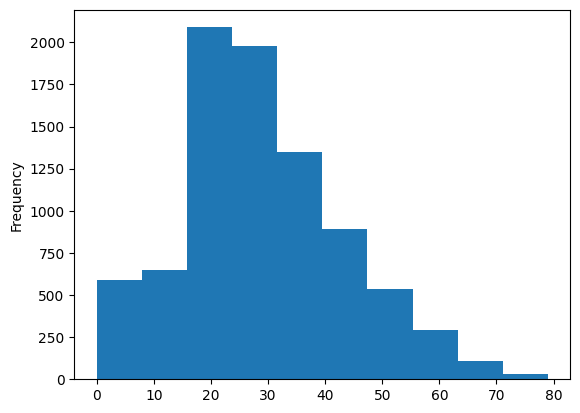

In [18]:
# Fill age
data["Age"].plot(kind="hist")
print(data[["VIP", "Age"]].groupby('VIP').mean())
print(data[["HomePlanet", "Age"]].groupby('HomePlanet').mean())
print(data[["Spa", "Age"]].corr())

In [10]:
# Fill VIP
# Insignificant
pd.crosstab(data.Destination, data.VIP, margins=True, normalize="index")
# Earth -> VIP = False
pd.crosstab(data.HomePlanet, data.VIP, margins=True, normalize="index")
# Insignificant
pd.crosstab(data.CryoSleep, data.VIP, margins=True, normalize="index")

VIP,False,True
CryoSleep,,
False,0.967093,0.032907
True,0.992910,0.007090
All,0.976329,0.023671


In [12]:
# Nothing really correlates
data[["Age",
    "RoomService",
    "FoodCourt",
    "ShoppingMall",
    "Spa",
    "VRDeck"]].corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000


In [14]:
# Insignificant
data[["Destination", "Age"]].groupby('Destination').mean()
# Significant
data[["Destination", "RoomService"]].groupby('Destination').mean()

,RoomService
Destination,
55 Cancri e,192.818746
PSO J318.5-22,90.601290
TRAPPIST-1e,252.950752


In [98]:
from pipeline.pipeline import impute
data = impute(data)

In [100]:
from pipeline.pipeline import make_pipeline
data = make_pipeline(data)

/workspaces/kaggle-actions/spaceship_titanic/spaceship/pipeline/pipeline.py:24: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data = pd.get_dummies(data, prefix=['CryoSleep'], columns = ['CryoSleep'], drop_first=False)


In [80]:
data.columns.values[0:1000]

array(['PassengerId', 'Cabin', 'Age', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'VIP_False', 'VIP_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Num',
       'No_Deck_Indicator', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Side_P', 'Side_S',
       'CryoSleep_False', 'CryoSleep_True'], dtype=object)